In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

a=api.dataset_download_files('carlmcbrideellis/llm-7-prompt-training-dataset')
# KaggleApi를 통해 carlmbrideellis/llm-7-prompt-training-dataset을 불러온다.
# url: https://www.kaggle.com/datasets/carlmcbrideellis/llm-7-prompt-training-dataset

import zipfile

zip_path = 'C:/Users/gksxo/Desktop/2023학년도 2학기/오픈소스-조겨리 교수님/기말프로젝트/llm-7-prompt-training-dataset.zip'  # 압축 파일 경로
extract_path = 'C:/Users/gksxo/Desktop/2023학년도 2학기/오픈소스-조겨리 교수님/기말프로젝트'  # 압축 해제 경로

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [3]:
prompt=pd.read_csv("C:/Users/gksxo/Desktop/2023학년도 2학기/오픈소스-조겨리 교수님/기말프로젝트/train_essays_7_prompts_v2.csv")
print(prompt.shape)
prompt.head()

(15350, 2)


,text,label
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [4]:
prompt.isna().sum()

text     0
label    0
dtype: int64

In [5]:
prompt.describe()

,label
count,15350.000000
mean,0.106710
std,0.308754
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
a=prompt.groupby("label")
a.count() # count method 사용 - 메소드 1가지 사용

,text
label,
0,13712
1,1638


# NOTICE!
##### 0과 1으로 구분한 내용에 대하여는 text이기 때문에 describe, info, mean 등의 수치해석의 method를 사용할 수 없음 -> 따라서 텍스트에 대한 단어 수, 문자 수, 독특한 단어 수를 확인함

In [7]:
# 라벨이 0인 텍스트만 필터링하여 저장
text_0 = prompt[prompt['label'] == 0]

# 라벨이 1인 텍스트만 필터링하여 저장
text_1 = prompt[prompt['label'] == 1]

In [8]:
#라벨이 0인 텍스트에 대하여 단어 수, 문자 수, 독특한 단어 수 확인
#1. 단어 수
text_0['word_count'] = text_0['text'].apply(lambda x: len(str(x).split()))
print(text_0[text_0['label']==0]['word_count'].mean()) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets

#2. 문자 수
text_0['char_count'] = text_0['text'].apply(lambda x: len(str(x)))
print(text_0[text_0['label']==0]['char_count'].mean()) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets

#3. 독특한 단어 수
text_0['unique_word_count'] = text_0['text'].apply(lambda x: len(set(str(x).split())))
print(text_0[text_0['label']==0]['unique_word_count'].mean()) #Non-Disaster tweets

416.8986289381564
2335.516554842474


C:\Users\gksxo\AppData\Local\Temp\ipykernel_30088\2543219456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_0['word_count'] = text_0['text'].apply(lambda x: len(str(x).split()))
C:\Users\gksxo\AppData\Local\Temp\ipykernel_30088\2543219456.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_0['char_count'] = text_0['text'].apply(lambda x: len(str(x)))


208.16766336056008


C:\Users\gksxo\AppData\Local\Temp\ipykernel_30088\2543219456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_0['unique_word_count'] = text_0['text'].apply(lambda x: len(set(str(x).split())))


In [9]:
#라벨이 1인 텍스트에 대하여 단어 수, 문자 수, 독특한 단어 수 확인
#1. 단어 수
text_1['word_count'] = text_1['text'].apply(lambda x: len(str(x).split()))
print(text_1[text_1['label']==1]['word_count'].mean()) #Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets

#2. 문자 수
text_1['char_count'] = text_1['text'].apply(lambda x: len(str(x)))
print(text_1[text_1['label']==1]['char_count'].mean()) #Disaster tweets
#Disaster tweets are longer than the non-disaster tweets

#3. 독특한 단어 수
text_1['unique_word_count'] = text_1['text'].apply(lambda x: len(set(str(x).split())))
print(text_1[text_1['label']==1]['unique_word_count'].mean()) #Disaster tweets

407.523199023199
2638.7240537240536
222.22649572649573


C:\Users\gksxo\AppData\Local\Temp\ipykernel_30088\1995270096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_1['word_count'] = text_1['text'].apply(lambda x: len(str(x).split()))
C:\Users\gksxo\AppData\Local\Temp\ipykernel_30088\1995270096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_1['char_count'] = text_1['text'].apply(lambda x: len(str(x)))
C:\Users\gksxo\AppData\Local\Temp\ipykernel_30088\1995270096.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

# MODULE IMPORT

In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#text 전처리를 위한 모듈들
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

#모델
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gksxo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gksxo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gksxo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gksxo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# prompt(text_0 + text_1 에 대한 단어 수, 문자 수, 독특한 단어 수를 재파악 - 아래의 그래프로 표현하기 위함)
#1. 단어 수
prompt['word_count'] = prompt['text'].apply(lambda x: len(str(x).split()))
print(prompt[prompt['label']==1]['word_count'].mean()) #Disaster tweets
print(prompt[prompt['label']==0]['word_count'].mean()) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets

#2. 문자 수
prompt['char_count'] = prompt['text'].apply(lambda x: len(str(x)))
print(prompt[prompt['label']==1]['char_count'].mean()) #Disaster tweets
print(prompt[prompt['label']==0]['char_count'].mean()) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets

#3. 독특한 단어 수
prompt['unique_word_count'] = prompt['text'].apply(lambda x: len(set(str(x).split())))
print(prompt[prompt['label']==1]['unique_word_count'].mean()) #Disaster tweets
print(prompt[prompt['label']==0]['unique_word_count'].mean()) #Non-Disaster tweets

407.523199023199
416.8986289381564
2638.7240537240536
2335.516554842474
222.22649572649573
208.16766336056008


# tweet 당 단어 수 그래프 그리기

1. histplot

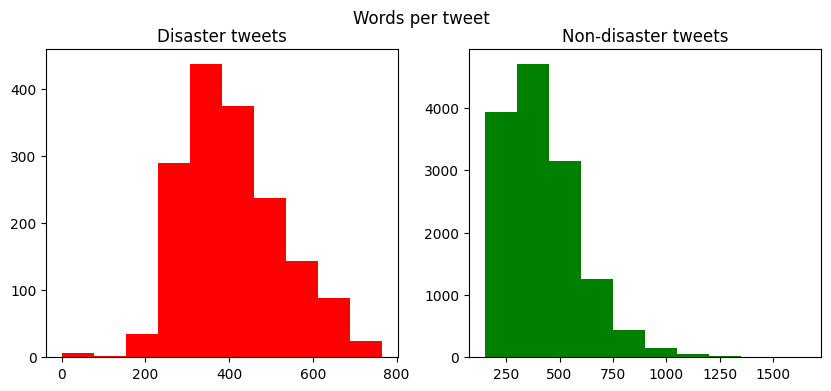

In [14]:
#tweet 당 단어 수 그래프 그리기
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=prompt[prompt['label']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=prompt[prompt['label']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

2. violinplot

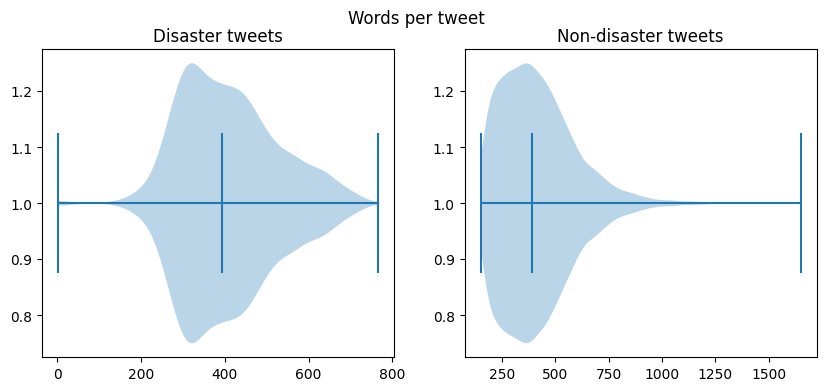

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
train_words = prompt[prompt['label'] == 1]['word_count']
ax1.violinplot(train_words, vert=False, showmedians=True, widths=0.5)
ax1.set_title('Disaster tweets')
train_words = prompt[prompt['label'] == 0]['word_count']
ax2.violinplot(train_words, vert=False, showmedians=True, widths=0.5)
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()


3. boxplot

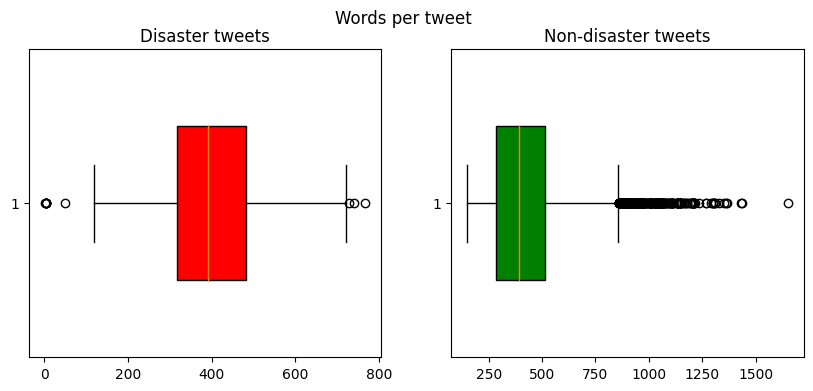

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
train_words = prompt[prompt['label'] == 1]['word_count']
ax1.boxplot(train_words, vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='red'))
ax1.set_title('Disaster tweets')
train_words = prompt[prompt['label'] == 0]['word_count']
ax2.boxplot(train_words, vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='green'))
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()


# Preprocessing(텍스트들에 대한 전처리 - NLP(자연어처리)에서 기본적인 텍스트를 분석해서 모델에 집어넣기 전에 하는 불용어,어간,표제어 등의 처리)

In [ ]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#소문자로 변환하고 구두점과 문자를 제거한 후 공백 제거
def preprocess(text):
    text = text.lower() #텍스트를 소문자로 변환
    text=text.strip()  #앞뒤 공백 제거 
    text=re.compile('<.*?>').sub('', text) #HTML 태그/마크업 제거
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #구두점을 공백으로 대체. 구두점이 때때로 유용할 수 있으니 주의    
    text = re.sub('\s+', ' ', text)  #여분의 공백과 탭 제거
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9]는 모든 숫자(0부터 10000까지)를 매치
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #\d는 모든 숫자를 매치, \D는 숫자가 아닌 것을 매치
    text = re.sub(r'\s+',' ',text) #\s는 모든 공백을 매치, \s+는 여러 공백을 매치, \S는 공백이 아닌 것을 매치 
    
    return text

text=preprocess(text)
print(text)  #text는 문자열

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [ ]:
#3. LEXICON-BASED TEXT PROCESSING
 
#1. STOPWORD REMOVAL(불용어 제거)
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING(어간 추출)
 
# Initialize the stemmer(어간 추출기 초기화)
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION(표제어 추출)
# Initialize the lemmatizer(표제어 추출기 초기화)
wl = WordNetLemmatizer()
 

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence(문장 토큰화)
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) #위치 태그 가져오기
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # 위치 태그를 매핑하고 단어/토큰을 표제어 추출
    return " ".join(a)

text = lemmatizer(text)
print(text)

message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [ ]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

prompt['clean_text'] = prompt['text'].apply(lambda x: finalpreprocess(x))
prompt=prompt.drop(columns=['word_count','char_count','unique_word_count'])
prompt.head()

,text,label,clean_text
0,Cars. Cars have been around since they became ...,0,car car around since become famous henry ford ...
1,Transportation is a large necessity in most co...,0,transportation large necessity country worldwi...
2,"""America's love affair with it's vehicles seem...",0,america love affair vehicle seem cool say elis...
3,How often do you ride in a car? Do you drive a...,0,often ride car drive one motor vehicle work st...
4,Cars are a wonderful thing. They are perhaps o...,0,car wonderful thing perhaps one world great ad...


In [ ]:
# create Word2vec model(Word2vec 모델 생성)
# 여기서 words_f는 각 문서에서 단어를 포함하는 리스트여야 합니다. 예를 들어, 리스트의 첫 번째 행은 첫 번째 문서/문장의 단어입니다.
# words_f의 길이는 데이터셋의 문서/문장 수입니다.
prompt['clean_text_tok']=[nltk.word_tokenize(i) for i in prompt['clean_text']] #전처리된 문장을 토큰화된 문장으로 변환
model = Word2Vec(prompt['clean_text_tok'],min_count=1)  # min_count=1은 단어가 모든 문서에서 최소한 한 번은 나타나야 한다는 의미입니다.
# if min_count=2은 단어가 모든 문서에서 두 번 미만으로 나타나면 고려하지 않아야 한다는 의미입니다.


w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #단어와 그 벡터의 조합

# Word2Vec의 결과인 단어 벡터에서 문장을 벡터/숫자로 변환하기 위한 클래스
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # 텍스트가 비어 있으면 다른 모든 벡터와 동일한 차원의 0 벡터를 반환해야 합니다.
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
# 학습 데이터셋을 학습 및 검증용으로 분리하기
 
# 입력: "clean_text",
# 타겟: "label"
X_train, X_val, y_train, y_val = train_test_split(prompt["clean_text"],
                                                  prompt["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]
X_val_tok= [nltk.word_tokenize(i) for i in X_val]     

#TF-IDF
# 모델은 숫자로만 실행할 수 있으므로 x_train을 벡터로 변환하고 단어를 이용 - Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf는 word2vec와 달리 토큰화되지 않은 문장에서 실행
# x_test만 변환합니다 (fit and transform이 아님)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [ ]:
#로지스틱 회귀를 사용하여 분류 모델 적합(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#테스트 데이터셋에 대한 y 값을 예측
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      0.99      0.99       320

    accuracy                           1.00      3070
   macro avg       1.00      1.00      1.00      3070
weighted avg       1.00      1.00      1.00      3070

Confusion Matrix: [[2749    1]
 [   3  317]]
AUC: 0.9999715909090909
